Este colab fue desarrollado por Arnold Charry Armero

#Eat-A-Bite Fastfood Company

La Eat‐A‐Bite Fastfood Company opera un restaurante que funciona 24 horas al día. En la empresa trabajan diversas personas, y cada una de ellas lo hace 8 horas consecutivas por día. Debido a que la demanda varía durante el día, el número de empleados que se requiere varía con el tiempo. Con base en experiencias pasadas, la compañía ha proyectado el requerimiento mínimo de obra para cada período de 4 horas del día.
Cuántos empleados deben empezar a trabajar en cada franja horaria, de manera que el número total de empleados contratados para atender el restaurante sea el más pequeño posible?

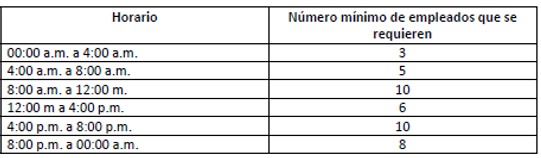

## Conjuntos


$ i = \text{Empleados que comienzan en la franja (hora) } i$

## Parámetros

$ P_{ij} = \textrm{1 si el trabajador } i \textrm{ se encuentra disponible en el momento } j \textrm{, 0 lo contrario.}$

$ D_{j} = \textrm{Números de trabajadores } j \textrm{ necesarios}$

## Variables de decisión

$ x_{i} = \textrm{Trabajadores que comienzan su empleo en la franja } i $

## Función objetivo

$$ \textrm{Min } z = \sum_{i = 1}^{n}x_{i} $$

## Restricciones

Se debe satisfacer la demanda $j$,

$$ \sum_{i = 1}^{n}x_{i} P_{ij} \geq D_{j}, \forall i$$

In [ ]:
#Se instala la libreria
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 33.1 MB/s eta 0:00:00


In [ ]:
#Se importa la libreria
from pulp import *

In [ ]:
#Conjuntos
dia = range(6)
dias = range(6)

In [ ]:
# Parámetros
D = [3, 5, 10, 6, 10, 8]

# Número de días en la semana
num_dias = 6

def crear_matriz_turnos(num_dias):
    # Crear una matriz de ceros
    matriz_turnos = [[0 for _ in range(num_dias)] for _ in range(num_dias)]

    # Asignar turnos de trabajo (5 días trabajados, 2 días de descanso)
    for i in range(num_dias):
        # Determinar el inicio del ciclo de trabajo del empleado
        inicio = i % num_dias
        for dia in range(num_dias):
            if (dia >= inicio and dia < inicio + 2) or (inicio + 2 > num_dias and dia < (inicio + 2) % num_dias):
                matriz_turnos[i][dia] = 1

    return matriz_turnos

# Llamar a la función para crear la matriz de turnos
P = crear_matriz_turnos(num_dias)

# Mostrar la matriz
print("---Matriz de Turnos---")
for i in range(num_dias):
    for j in range(num_dias):
        print(P[i][j], end="  " if P[i][j] >= 0 and P[i][j] < 10 else " ")
    print("")

---Matriz de Turnos---
1  1  0  0  0  0  
0  1  1  0  0  0  
0  0  1  1  0  0  
0  0  0  1  1  0  
0  0  0  0  1  1  
1  0  0  0  0  1  


In [ ]:
# Crear la instancia del modelo
model = LpProblem(name="Work-Scheduling", sense=LpMinimize)

# Inicialización de las variables de decisión
X = LpVariable.dicts("X", (dia), 0, None, LpInteger)

#Función objetivo
model += lpSum([X[i] for i in dia])

# Restricciones
for j in dias:
    model += lpSum([X[i] * P[i][j] for i in dia]) >= D[j]

# Resolver el problema
model.solve()

# Imprimir el estado del problema
print("Status:", LpStatus[model.status])

# Imprimir las variables
for v in model.variables():
    print(v.name, "=", v.varValue)

# Imprimir la función objetivo
print("Trabajadores contratados =", value(model.objective))

Status: Optimal
X_0 = 0.0
X_1 = 9.0
X_2 = 1.0
X_3 = 5.0
X_4 = 5.0
X_5 = 3.0
Trabajadores contratados = 23.0


In [ ]:
model

Work-Scheduling:
MINIMIZE
1*X_0 + 1*X_1 + 1*X_2 + 1*X_3 + 1*X_4 + 1*X_5 + 0
SUBJECT TO
_C1: X_0 + X_5 >= 3

_C2: X_0 + X_1 >= 5

_C3: X_1 + X_2 >= 10

_C4: X_2 + X_3 >= 6

_C5: X_3 + X_4 >= 10

_C6: X_4 + X_5 >= 8

VARIABLES
0 <= X_0 Integer
0 <= X_1 Integer
0 <= X_2 Integer
0 <= X_3 Integer
0 <= X_4 Integer
0 <= X_5 Integer